In [1]:
import tradingeconomics as te
import matplotlib.pyplot as plt
import pandas as pd

import os
os.chdir('..')
from helper import get_api_key

In [ ]:
te.login(get_api_key())

In [3]:
raw_hist_general_df = te.getHistoricalEurostat(ID = '78963', initDate = '2018-01-01', endDate = '2020-01-01', output_type = 'df')

In [4]:
raw_hist_air_df=te.getHistoricalEurostat(ID = '75708', initDate = '2018-01-01', endDate = '2020-01-01', output_type = 'df')
raw_hist_train_df=te.getHistoricalEurostat(ID = '78493', initDate = '2018-01-01', endDate = '2020-01-01', output_type = 'df')

In [5]:
raw_hist_bus_df=te.getHistoricalEurostat(ID = '77769', initDate = '2018-01-01', endDate = '2020-01-01', output_type = 'df')
raw_hist_underground_df=te.getHistoricalEurostat(ID = '85533', initDate = '2018-01-01', endDate = '2020-01-01', output_type = 'df')

In [6]:
general_df = raw_hist_general_df[['Date', 'Value']].rename(columns = {'Value': 'General'}).set_index('Date')
air_df = raw_hist_air_df[['Date', 'Value']].rename(columns = {'Value': 'Air'}).set_index('Date')
train_df = raw_hist_train_df[['Date', 'Value']].rename(columns = {'Value': 'Train'}).set_index('Date')
bus_df = raw_hist_bus_df[['Date', 'Value']].rename(columns = {'Value': 'Bus'}).set_index('Date')
underground_df = raw_hist_underground_df[['Date', 'Value']].rename(columns = {'Value': 'Underground'}).set_index('Date')


df = pd.merge(pd.merge(air_df, train_df, on ='Date'), bus_df, on='Date')
df = pd.merge(pd.merge(df, underground_df, on='Date'), general_df, on='Date')

df['formatted_date'] = pd.to_datetime(df.index)
df=df.reindex(df['formatted_date'])

del df['formatted_date']
df


,Air,Train,Bus,Underground,General
formatted_date,,,,,
2019-12-31,127.38,96.20,91.20,91.61,102.77
2019-11-30,103.54,96.20,91.58,91.61,95.97
2019-10-31,113.30,96.20,91.58,91.61,98.70
2019-09-30,124.30,96.20,91.60,91.61,105.78
2019-08-31,144.90,96.35,91.98,91.61,111.94
2019-07-31,140.42,96.35,92.12,91.61,110.68
2019-06-30,125.97,96.54,92.22,91.61,103.82
2019-05-31,108.17,96.68,92.47,91.61,98.74
2019-04-30,123.09,96.84,93.70,91.61,103.57


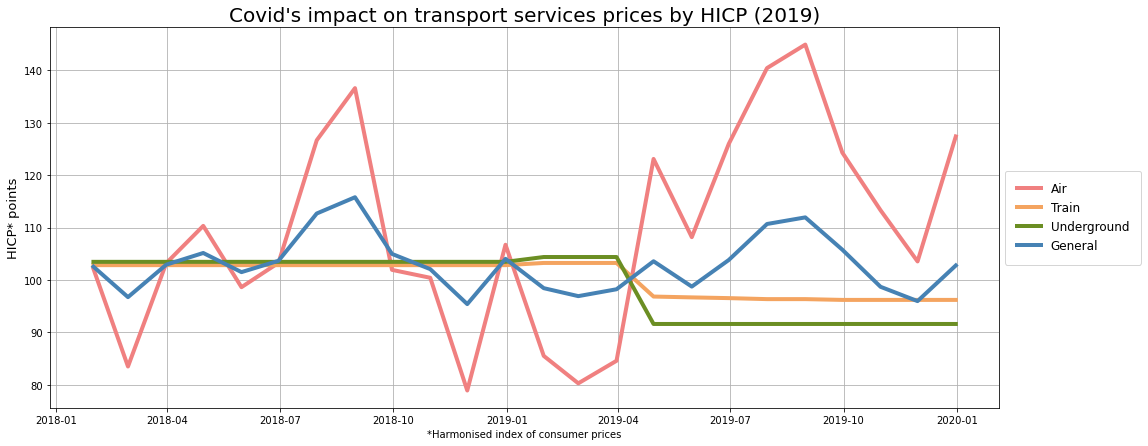

In [7]:
plt.subplots(figsize=(17, 7))

plt.plot( df.index.tolist(), df['Air'].values.tolist(), color='lightcoral', linewidth=4, label="Air")
plt.plot( df.index.tolist(), df['Train'].values.tolist(), color='sandybrown', linewidth=4, label="Train")
plt.plot( df.index.tolist(), df['Underground'].values.tolist(),  color='olivedrab', linewidth=4, label="Underground")
plt.plot( df.index.tolist(), df['General'].values.tolist(),  color='steelblue', linewidth=4, label="General")


plt.legend(
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          fontsize=12,
          ncol=1,
          title_fontsize=14,
          borderpad=1)
plt.grid(True)
plt.ylabel('HICP* points', fontsize=13)
plt.xlabel('*Harmonised index of consumer prices', fontsize=10)
plt.title("Covid's impact on transport services prices by HICP (2019)", size=20)
plt.show()